In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

Mouse: 

Quake_10x_Mammary_Gland (new selected genes, no batch effect) NP

Quake_Smart-seq2_Mammary_Gland (new selected genes, "donor" batch effect) NP

Bach (new selected genes, no batch effect) four lifestage: L, G, PI, NP

Giraddi_10x (not ok! pseudotime,)

Sun (not ok! small cell number, abandoned)two lifestage: pregnant, virgin

Mouse_aligned: not ok! 
#（Maybe we can delete B cell and T cell?）

Quake_10x_Mammary_Gland, Quake_Smart-seq2_Mammary_Gland, Bach, Sun



Human:

Nguyen_10x (new selected genes, "donor" batch effect)

Nguyen_C1 (not ok! small cell number, abandoned)

Human_aligned: not ok!


---
# Mouse
### Quake_10x_Mammary_Gland

,cell_ontology_class,cell_ontology_id,cell_type1,cluster,dataset_name,donor,free_annotation,gender,organ,organism,plate,platform,region
10X_P7_12_AAACCTGAGTTGAGAT,luminal epithelial cell of mammary gland,CL:0002326,luminal epithelial cell of mammary gland,6.0,Quake_10x_Mammary_Gland,3-F-56,luminal progenitor cell,F,Mammary Gland,Mus musculus,10X_P7_12,10x,
10X_P7_12_AAACCTGTCGTCACGG,B cell,CL:0000236,B cell,1.0,Quake_10x_Mammary_Gland,3-F-56,B cell,F,Mammary Gland,Mus musculus,10X_P7_12,10x,
10X_P7_12_AAACCTGTCTTGTACT,stromal cell,CL:0000499,stromal cell,3.0,Quake_10x_Mammary_Gland,3-F-56,stromal cell,F,Mammary Gland,Mus musculus,10X_P7_12,10x,
10X_P7_12_AAACCTGTCTTTAGTC,stromal cell,CL:0000499,stromal cell,3.0,Quake_10x_Mammary_Gland,3-F-56,stromal cell,F,Mammary Gland,Mus musculus,10X_P7_12,10x,
10X_P7_12_AAACGGGCAGTGGGAT,B cell,CL:0000236,B cell,1.0,Quake_10x_Mammary_Gland,3-F-56,B cell,F,Mammary Gland,Mus musculus,10X_P7_12,10x,


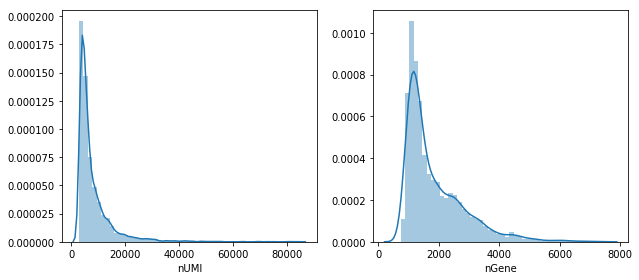

In [2]:
quake_10x_mammary_gland = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_10x_Mammary_Gland/data.h5")
utils.peek(quake_10x_mammary_gland, "Quake_10x_Mammary_Gland")
quake_10x_mammary_gland = quake_10x_mammary_gland.normalize()
quake_10x_mammary_gland.obs.head()

In [3]:
quake_10x_mammary_gland_model = cb.directi.fit_DIRECTi(
    quake_10x_mammary_gland, quake_10x_mammary_gland.uns["seurat_genes"],
    **fixed_model_kwargs, 
    path="/tmp/cb/db/Quake_10x_Mammary_Gland/model_0"
)
quake_10x_mammary_gland.latent = quake_10x_mammary_gland_model.inference(quake_10x_mammary_gland)

[DIRECTi epoch 0] train=1.948, val=1.951, time elapsed=1.5s Best save...
[DIRECTi epoch 1] train=1.943, val=1.942, time elapsed=0.7s Best save...
[DIRECTi epoch 2] train=1.930, val=1.923, time elapsed=0.4s Best save...
[DIRECTi epoch 3] train=1.905, val=1.892, time elapsed=0.4s Best save...
[DIRECTi epoch 4] train=1.748, val=1.504, time elapsed=0.7s Best save...
[DIRECTi epoch 5] train=1.086, val=0.828, time elapsed=0.4s Best save...
[DIRECTi epoch 6] train=0.805, val=0.827, time elapsed=0.4s Best save...
[DIRECTi epoch 7] train=0.732, val=0.788, time elapsed=0.6s Best save...
[DIRECTi epoch 8] train=0.729, val=0.734, time elapsed=0.5s Best save...
[DIRECTi epoch 9] train=0.720, val=0.732, time elapsed=0.4s Best save...
[DIRECTi epoch 10] train=0.717, val=0.736, time elapsed=0.4s
[DIRECTi epoch 11] train=0.716, val=0.715, time elapsed=0.7s Best save...
[DIRECTi epoch 12] train=0.711, val=0.714, time elapsed=0.4s Best save...
[DIRECTi epoch 13] train=0.700, val=0.703, time elapsed=0.4s 

[  Info   ] Computing tSNE...


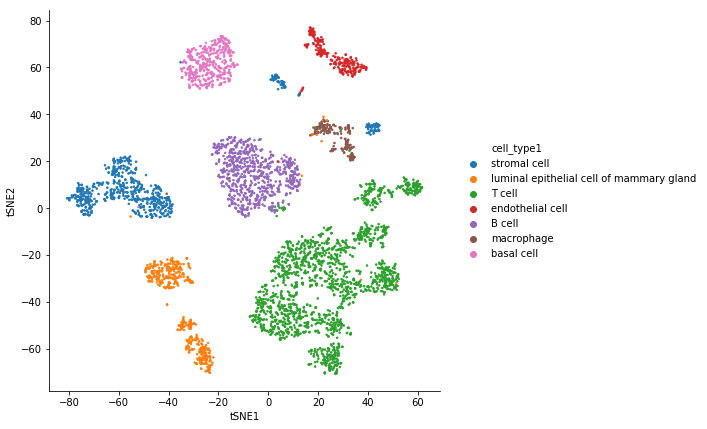

In [4]:
plot = quake_10x_mammary_gland.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_10x_Mammary_Gland/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


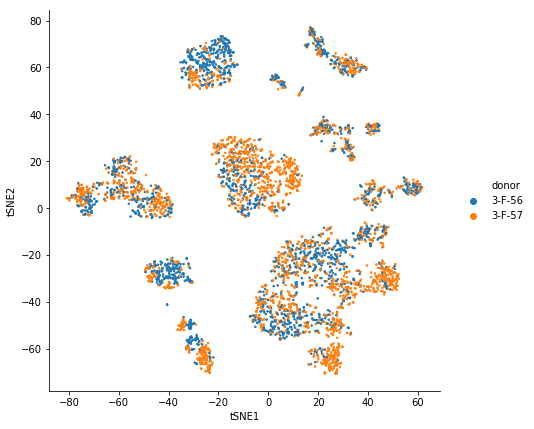

In [5]:
plot = quake_10x_mammary_gland.visualize_latent("donor")
plot.get_figure().savefig("Quake_10x_Mammary_Gland/donor.pdf", bbox_inches="tight")

In [6]:
%%capture capio
quake_10x_mammary_gland_models = [quake_10x_mammary_gland_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_10x_mammary_gland_models.append(cb.directi.fit_DIRECTi(
        quake_10x_mammary_gland, quake_10x_mammary_gland.uns["seurat_genes"],
        **fixed_model_kwargs, 
        random_seed=i, path="/tmp/cb/db/Quake_10x_Mammary_Gland/model_%d" % i
    ))
quake_10x_mammary_gland_blast = cb.blast.BLAST(quake_10x_mammary_gland_models, quake_10x_mammary_gland, 
                                               keep_exprs=True).build_empirical()
quake_10x_mammary_gland_blast.save("Quake_10x_Mammary_Gland")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Mammary_Gland/model_1/checkpoint-173
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Mammary_Gland/model_2/checkpoint-142
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Mammary_Gland/model_3/checkpoint-161


In [7]:
with open("Quake_10x_Mammary_Gland/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_10x_Mammary_Gland/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [8]:
utils.self_projection(quake_10x_mammary_gland_blast, "Quake_10x_Mammary_Gland")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9866
Accuracy = 0.9968


### Quake_Smart_seq2_Mammary_Gland

,cell_ontology_class,cell_ontology_id,cell_type1,channel,cluster,dataset_name,donor,free_annotation,gender,organ,organism,platform,region
A11.B002432.3_38_F.1.1,luminal epithelial cell of mammary gland,CL:0002326,luminal epithelial cell of mammary gland,B002432,1.0,Quake_Smart-seq2_Mammary_Gland,3_38_F,luminal progenitor,F,Mammary Gland,Mus musculus,Smart-seq2,Mammary_Gland
B13.B002432.3_38_F.1.1,luminal epithelial cell of mammary gland,CL:0002326,luminal epithelial cell of mammary gland,B002432,1.0,Quake_Smart-seq2_Mammary_Gland,3_38_F,luminal progenitor,F,Mammary Gland,Mus musculus,Smart-seq2,Mammary_Gland
I21.B002432.3_38_F.1.1,basal cell,CL:0000646,basal cell,B002432,0.0,Quake_Smart-seq2_Mammary_Gland,3_38_F,basal cell,F,Mammary Gland,Mus musculus,Smart-seq2,Mammary_Gland
K1.B002432.3_38_F.1.1,basal cell,CL:0000646,basal cell,B002432,0.0,Quake_Smart-seq2_Mammary_Gland,3_38_F,basal cell,F,Mammary Gland,Mus musculus,Smart-seq2,Mammary_Gland
L6.B002432.3_38_F.1.1,basal cell,CL:0000646,basal cell,B002432,0.0,Quake_Smart-seq2_Mammary_Gland,3_38_F,basal cell,F,Mammary Gland,Mus musculus,Smart-seq2,Mammary_Gland


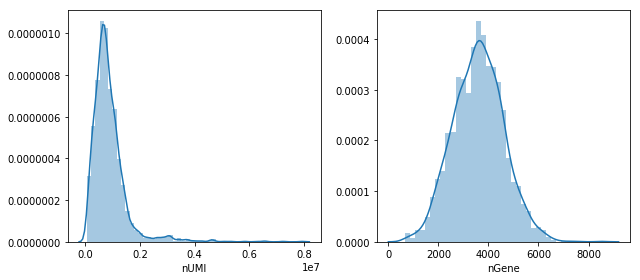

In [9]:
quake_smart_seq2_mammary_gland = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_Smart-seq2_Mammary_Gland/data.h5")
utils.peek(quake_smart_seq2_mammary_gland, "Quake_Smart-seq2_Mammary_Gland")
quake_smart_seq2_mammary_gland = quake_smart_seq2_mammary_gland.normalize()
quake_smart_seq2_mammary_gland.obs.head()

In [10]:
opt_model_kwargs = dict(batch_effect="donor")
quake_smart_seq2_mammary_gland_model = cb.directi.fit_DIRECTi(
    quake_smart_seq2_mammary_gland, quake_smart_seq2_mammary_gland.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Quake_Smart-seq2_Mammary_Gland/model_0"
)
quake_smart_seq2_mammary_gland.latent = quake_smart_seq2_mammary_gland_model.inference(quake_smart_seq2_mammary_gland)

[DIRECTi epoch 0] train=2.500, val=2.643, time elapsed=1.2s Regular save...
[DIRECTi epoch 1] train=2.493, val=2.634, time elapsed=0.2s
[DIRECTi epoch 2] train=2.483, val=2.623, time elapsed=0.2s
[DIRECTi epoch 3] train=2.474, val=2.611, time elapsed=0.2s
[DIRECTi epoch 4] train=2.462, val=2.596, time elapsed=0.2s
[DIRECTi epoch 5] train=2.442, val=2.572, time elapsed=0.2s
[DIRECTi epoch 6] train=2.405, val=2.509, time elapsed=0.2s
[DIRECTi epoch 7] train=2.247, val=2.256, time elapsed=0.2s
[DIRECTi epoch 8] train=1.784, val=1.431, time elapsed=0.2s
[DIRECTi epoch 9] train=1.110, val=1.148, time elapsed=0.2s
[DIRECTi epoch 10] train=0.952, val=1.078, time elapsed=0.2s Regular save...
[DIRECTi epoch 11] train=0.944, val=1.045, time elapsed=0.2s
[DIRECTi epoch 12] train=0.935, val=1.041, time elapsed=0.2s
[DIRECTi epoch 13] train=0.939, val=1.027, time elapsed=0.2s
[DIRECTi epoch 14] train=0.937, val=1.048, time elapsed=0.2s
[DIRECTi epoch 15] train=0.933, val=1.009, time elapsed=0.2s
[D

[  Info   ] Computing tSNE...


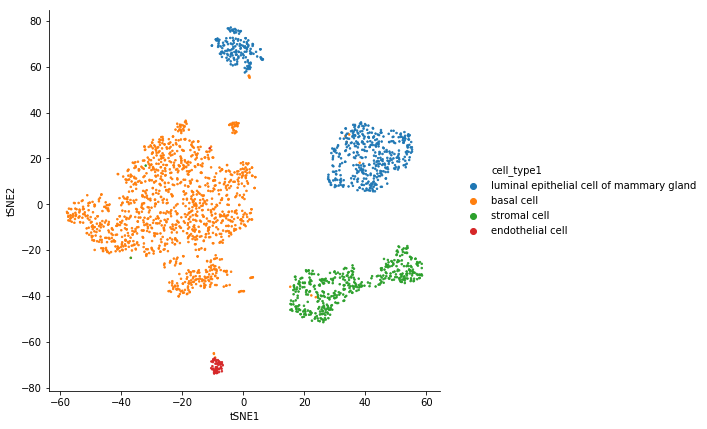

In [11]:
plot = quake_smart_seq2_mammary_gland.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_Smart-seq2_Mammary_Gland/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


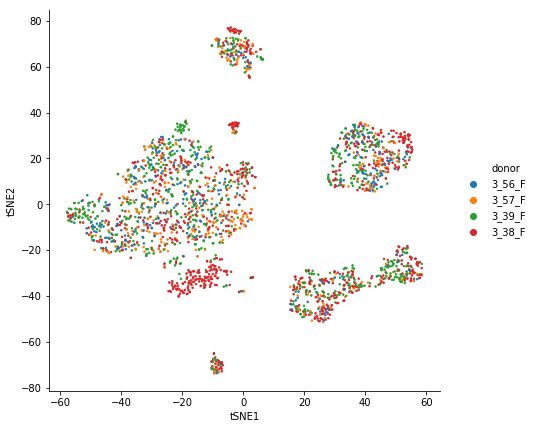

In [12]:
plot = quake_smart_seq2_mammary_gland.visualize_latent("donor")
plot.get_figure().savefig("Quake_Smart-seq2_Mammary_Gland/donor.pdf", bbox_inches="tight")

In [13]:
%%capture capio
quake_smart_seq2_mammary_gland_models = [quake_smart_seq2_mammary_gland_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_smart_seq2_mammary_gland_models.append(cb.directi.fit_DIRECTi(
        quake_smart_seq2_mammary_gland, quake_smart_seq2_mammary_gland.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_Smart-seq2_Mammary_Gland/model_%d" % i
    ))
quake_smart_seq2_mammary_gland_blast = cb.blast.BLAST(quake_smart_seq2_mammary_gland_models, quake_smart_seq2_mammary_gland, 
                                               keep_exprs=True).build_empirical()
quake_smart_seq2_mammary_gland_blast.save("Quake_Smart-seq2_Mammary_Gland")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Mammary_Gland/model_1/checkpoint-254
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Mammary_Gland/model_2/checkpoint-220
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Mammary_Gland/model_3/checkpoint-280


In [14]:
with open("Quake_Smart-seq2_Mammary_Gland/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_Smart-seq2_Mammary_Gland/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [15]:
utils.self_projection(quake_smart_seq2_mammary_gland_blast, "Quake_Smart-seq2_Mammary_Gland")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.8744
Accuracy = 0.9976


### Bach

,cell_ontology_class,cell_ontology_id,cell_type1,dataset_name,donor,lifestage,organ,organism,percent.mito,platform,region,umisums
AAACCTGAGGAATTAC-1,luminal epithelial cell of mammary gland,CL:0002326,Lp,Bach,1,PI,Mammary Gland,Mus musculus,0.002324,10x,epithelial cells,3442.0
AAACCTGTCTCTTATG-1,luminal epithelial cell of mammary gland,CL:0002326,Lp,Bach,1,PI,Mammary Gland,Mus musculus,0.006876,10x,epithelial cells,13671.0
AAACGGGAGCCCAACC-1,luminal epithelial cell of mammary gland,CL:0002326,Hsp,Bach,1,PI,Mammary Gland,Mus musculus,0.009754,10x,epithelial cells,20709.0
AAACGGGAGTGACATA-1,luminal epithelial cell of mammary gland,CL:0002326,Lp,Bach,1,PI,Mammary Gland,Mus musculus,0.004087,10x,epithelial cells,4894.0
AAACGGGGTCTGCAAT-1,luminal epithelial cell of mammary gland,CL:0002326,Lp,Bach,1,PI,Mammary Gland,Mus musculus,0.006132,10x,epithelial cells,18753.0


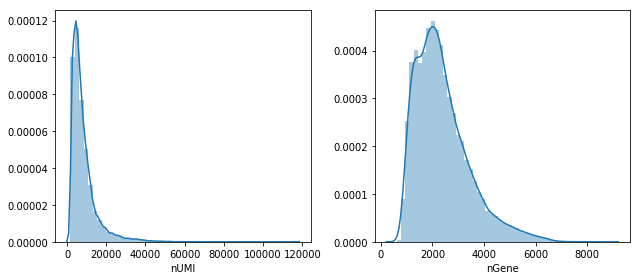

In [16]:
bach = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Bach/data.h5")
utils.peek(bach, "Bach")
bach = bach.normalize()
bach.obs.head()

In [17]:
bach_model = cb.directi.fit_DIRECTi(
    bach, bach.uns["seurat_genes"],
    **fixed_model_kwargs, 
    path="/tmp/cb/db/Bach/model_0"
)
bach.latent = bach_model.inference(bach)

[DIRECTi epoch 0] train=2.319, val=1.249, time elapsed=2.7s Best save...
[DIRECTi epoch 1] train=1.064, val=0.991, time elapsed=1.8s Best save...
[DIRECTi epoch 2] train=0.960, val=0.946, time elapsed=1.8s Best save...
[DIRECTi epoch 3] train=0.935, val=0.928, time elapsed=1.8s Best save...
[DIRECTi epoch 4] train=0.925, val=0.923, time elapsed=1.9s Best save...
[DIRECTi epoch 5] train=0.916, val=0.914, time elapsed=1.8s Best save...
[DIRECTi epoch 6] train=0.906, val=0.904, time elapsed=1.8s Best save...
[DIRECTi epoch 7] train=0.899, val=0.902, time elapsed=1.8s Best save...
[DIRECTi epoch 8] train=0.894, val=0.892, time elapsed=1.8s Best save...
[DIRECTi epoch 9] train=0.887, val=0.891, time elapsed=1.8s Best save...
[DIRECTi epoch 10] train=0.877, val=0.873, time elapsed=1.9s Best save...
[DIRECTi epoch 11] train=0.870, val=0.867, time elapsed=1.9s Best save...
[DIRECTi epoch 12] train=0.864, val=0.864, time elapsed=1.9s Best save...
[DIRECTi epoch 13] train=0.860, val=0.859, time 

[  Info   ] Computing tSNE...


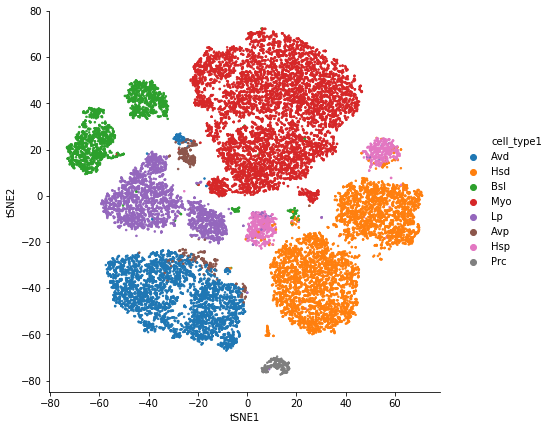

In [18]:
plot = bach.visualize_latent("cell_type1")
plot.get_figure().savefig("Bach/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


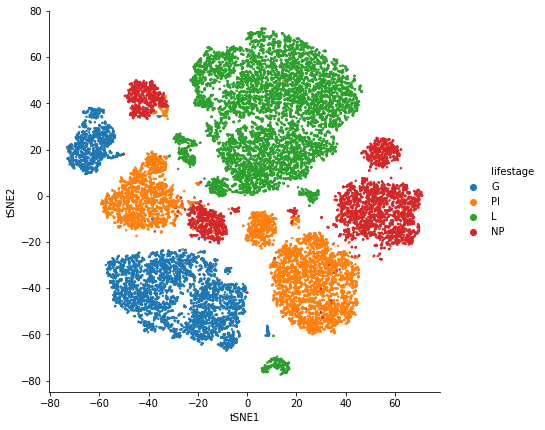

In [19]:
plot = bach.visualize_latent("lifestage")

[  Info   ] Using cached tSNE...


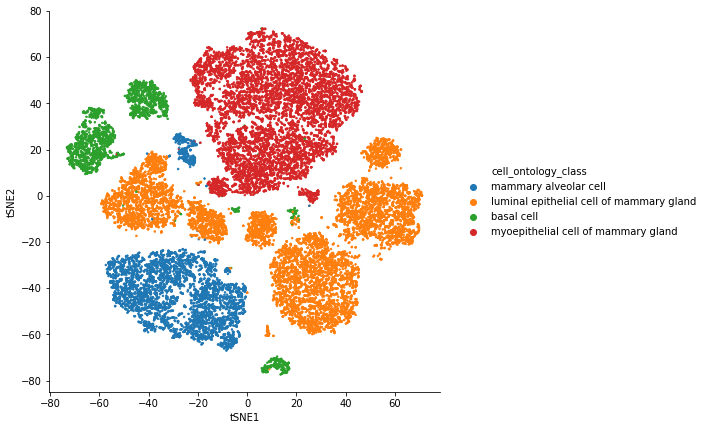

In [20]:
plot = bach.visualize_latent("cell_ontology_class")

[  Info   ] Using cached tSNE...


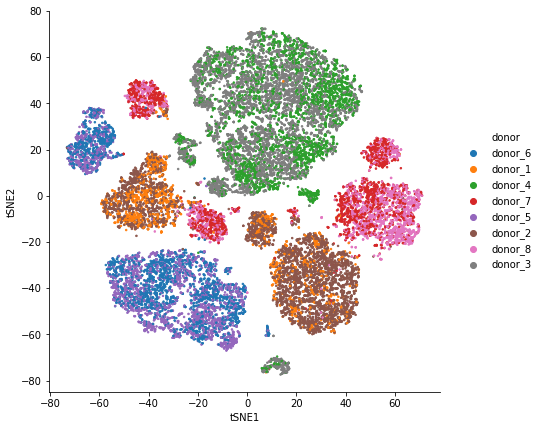

In [21]:
bach.obs["donor"] = "donor_" + bach.obs["donor"]
plot = bach.visualize_latent("donor")
plot.get_figure().savefig("Bach/donor.pdf", bbox_inches="tight")

In [22]:
%%capture capio
bach_models = [bach_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    bach_models.append(cb.directi.fit_DIRECTi(
        bach, bach.uns["seurat_genes"],
        **fixed_model_kwargs, 
        random_seed=i, path="/tmp/cb/db/Bach/model_%d" % i
    ))
bach_blast = cb.blast.BLAST(bach_models, bach, keep_exprs=True).build_empirical()
bach_blast.save("Bach")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Bach/model_1/checkpoint-102
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Bach/model_2/checkpoint-78
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Bach/model_3/checkpoint-139


In [23]:
with open("Bach/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Bach/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [24]:
utils.self_projection(bach_blast, "Bach")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9978
Accuracy = 0.9981


### Giraddi_10x

,cell_ontology_class,cell_ontology_id,cell_type1,dataset_name,lifestage,organ,organism,platform,pseudotime
E18__ATTACTCTCGGGAGTA,mammary stem cell,CL:0002451,Primitive,Giraddi_10x,E18,Mammary Gland,Mus musculus,10x,1
E18__GCATACATCTCTGTCG,mammary stem cell,CL:0002451,Primitive,Giraddi_10x,E18,Mammary Gland,Mus musculus,10x,2
E18__ATCATCTAGTGGAGTC,mammary stem cell,CL:0002451,Primitive,Giraddi_10x,E18,Mammary Gland,Mus musculus,10x,3
E18__ATGGGAGAGTGTACCT,mammary stem cell,CL:0002451,Primitive,Giraddi_10x,E18,Mammary Gland,Mus musculus,10x,4
E18__CATCAGAGTTACTGAC,mammary stem cell,CL:0002451,Primitive,Giraddi_10x,E18,Mammary Gland,Mus musculus,10x,5


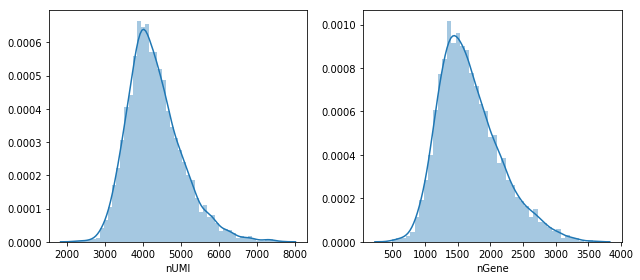

In [25]:
giraddi_10x = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Giraddi_10x/data.h5")
utils.peek(giraddi_10x, "Giraddi_10x")
giraddi_10x = giraddi_10x.normalize()
giraddi_10x.obs.head()

In [26]:
giraddi_10x_model = cb.directi.fit_DIRECTi(
    giraddi_10x, giraddi_10x.uns["seurat_genes"],
    **{**fixed_model_kwargs, "cat_dim": None}, 
    path="/tmp/cb/db/Giraddi_10x/model_0"
)
giraddi_10x.latent = giraddi_10x_model.inference(giraddi_10x)

[DIRECTi epoch 0] train=2.465, val=2.491, time elapsed=0.9s Best save...
[DIRECTi epoch 1] train=2.461, val=2.482, time elapsed=0.3s Best save...
[DIRECTi epoch 2] train=2.444, val=2.455, time elapsed=0.3s Best save...
[DIRECTi epoch 3] train=2.400, val=2.376, time elapsed=0.3s Best save...
[DIRECTi epoch 4] train=1.624, val=1.184, time elapsed=0.3s Best save...
[DIRECTi epoch 5] train=1.130, val=1.164, time elapsed=0.3s Best save...
[DIRECTi epoch 6] train=1.124, val=1.145, time elapsed=0.3s Best save...
[DIRECTi epoch 7] train=1.122, val=1.151, time elapsed=0.3s
[DIRECTi epoch 8] train=1.122, val=1.156, time elapsed=0.3s
[DIRECTi epoch 9] train=1.121, val=1.142, time elapsed=0.3s Best save...
[DIRECTi epoch 10] train=1.109, val=1.102, time elapsed=0.3s Best save...
[DIRECTi epoch 11] train=1.066, val=1.076, time elapsed=0.3s Best save...
[DIRECTi epoch 12] train=1.045, val=1.064, time elapsed=0.3s Best save...
[DIRECTi epoch 13] train=1.037, val=1.051, time elapsed=0.3s Best save...


In [27]:
giraddi_10x.obs["pseudotime"] = giraddi_10x.obs["pseudotime"].astype(np.int)

[  Info   ] Computing UMAP...


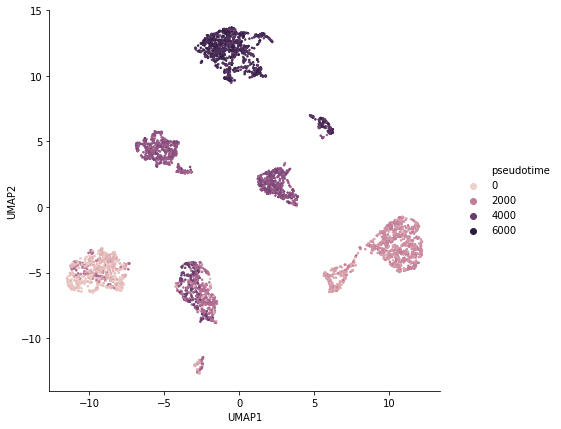

In [28]:
plot = giraddi_10x.visualize_latent("pseudotime", method="UMAP", dr_kws=dict(n_neighbors=5), reuse=False)
plot.get_figure().savefig("Giraddi_10x/pseudotime.pdf", bbox_inches="tight")

[  Info   ] Computing tSNE...


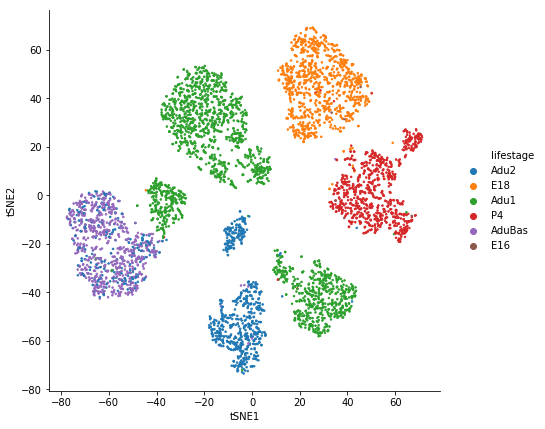

In [29]:
plot = giraddi_10x.visualize_latent("lifestage")
plot.get_figure().savefig("Giraddi_10x/lifestage.pdf", bbox_inches="tight")

In [30]:
%%capture capio
giraddi_10x_models = [giraddi_10x_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    giraddi_10x_models.append(cb.directi.fit_DIRECTi(
        giraddi_10x, giraddi_10x.uns["seurat_genes"],
        **{**fixed_model_kwargs, "cat_dim": None},
        random_seed=i, path="/tmp/cb/db/Giraddi_10x/model_%d" % i
    ))
giraddi_10x_blast = cb.blast.BLAST(giraddi_10x_models, giraddi_10x, 
                                               keep_exprs=True).build_empirical()
giraddi_10x_blast.save("Giraddi_10x")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Giraddi_10x/model_1/checkpoint-186
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Giraddi_10x/model_2/checkpoint-174
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Giraddi_10x/model_3/checkpoint-146


In [31]:
with open("Giraddi_10x/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Giraddi_10x/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [32]:
utils.self_projection(giraddi_10x_blast, "Giraddi_10x")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9383
Accuracy = 0.9155


## Mouse aligned

In [33]:
if not os.path.exists("ALIGNED_Mus_musculus_Mammary_Gland"):
    os.makedirs("ALIGNED_Mus_musculus_Mammary_Gland")
sun = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Sun/data.h5").normalize()
quake_smart_seq2_mammary_gland.obs["quake_smart_seq2_mammary_gland_donor"] = \
    quake_smart_seq2_mammary_gland.obs["donor"]
mouse = cb.data.ExprDataSet.merge_datasets(dict(
    quake_10x_mammary_gland=quake_10x_mammary_gland,
    quake_smart_seq2_mammary_gland=quake_smart_seq2_mammary_gland,
    sun=sun,
    bach=bach
), merge_uns_slots=["seurat_genes"])

[ Warning ] 4203 out of 27544 variables are not found, will be set to zero!
[ Warning ] 4203 out of 27544 variables are not found, will be set to zero!
[ Warning ] 8694 out of 27544 variables are not found, will be set to zero!
[ Warning ] 7579 out of 27544 variables are not found, will be set to zero!
[  Info   ] Merging uns slots...
[  Info   ] Merging var data frame...
[  Info   ] Merging obs data frame...
[  Info   ] Merging expression matrix...


/home/caozj/Software/conda/envs/cb-gpu/lib/python3.6/site-packages/Cell_BLAST/data.py:579: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  merged_obs = pd.concat(merged_obs)


In [34]:
mouse.obs.loc[mouse.obs["lifestage"] == "pregnant", "lifestage"] = "G"
mouse.obs.loc[np.logical_or(
    mouse.obs["lifestage"] == "virgin",
    np.in1d(mouse.obs["dataset_name"], ["Quake_10x_Mammary_Gland", "Quake_Smart-seq2_Mammary_Gland"])
), "lifestage"] = "NP"
mouse.obs["NP_dataset"] = mouse.obs["dataset_name"]
mouse.obs["G_dataset"] = mouse.obs["dataset_name"]
mouse.obs.loc[mouse.obs["lifestage"] != "NP", "NP_dataset"] = np.nan
mouse.obs.loc[mouse.obs["lifestage"] != "G", "G_dataset"] = np.nan

In [35]:
mouse.obs.head()

,cell_ontology_class,cell_ontology_id,cell_type1,channel,cluster,dataset_name,donor,free_annotation,gender,latent_1,...,percent.mito,plate,platform,quake_smart_seq2_mammary_gland_donor,region,tSNE1,tSNE2,umisums,NP_dataset,G_dataset
10X_P7_12_AAACCTGAGTTGAGAT,luminal epithelial cell of mammary gland,CL:0002326,luminal epithelial cell of mammary gland,NaN,6.0,Quake_10x_Mammary_Gland,3-F-56,luminal progenitor cell,F,-1.178543,...,NaN,10X_P7_12,10x,NaN,,-46.686344,-27.136402,NaN,Quake_10x_Mammary_Gland,NaN
10X_P7_12_AAACCTGTCGTCACGG,B cell,CL:0000236,B cell,NaN,1.0,Quake_10x_Mammary_Gland,3-F-56,B cell,F,0.849673,...,NaN,10X_P7_12,10x,NaN,,6.432502,22.624962,NaN,Quake_10x_Mammary_Gland,NaN
10X_P7_12_AAACCTGTCTTGTACT,stromal cell,CL:0000499,stromal cell,NaN,3.0,Quake_10x_Mammary_Gland,3-F-56,stromal cell,F,0.075235,...,NaN,10X_P7_12,10x,NaN,,-54.598484,3.495202,NaN,Quake_10x_Mammary_Gland,NaN
10X_P7_12_AAACCTGTCTTTAGTC,stromal cell,CL:0000499,stromal cell,NaN,3.0,Quake_10x_Mammary_Gland,3-F-56,stromal cell,F,1.688121,...,NaN,10X_P7_12,10x,NaN,,-62.012436,17.168278,NaN,Quake_10x_Mammary_Gland,NaN
10X_P7_12_AAACGGGCAGTGGGAT,B cell,CL:0000236,B cell,NaN,1.0,Quake_10x_Mammary_Gland,3-F-56,B cell,F,-0.660285,...,NaN,10X_P7_12,10x,NaN,,-9.341527,6.318496,NaN,Quake_10x_Mammary_Gland,NaN


In [36]:
opt_model_kwargs = dict(
    batch_effect=["quake_smart_seq2_mammary_gland_donor", "NP_dataset", "G_dataset"],
    #rmbatch_module=["MNNAdversarial", "Adversarial", "Adversarial", "Adversarial"],
    rmbatch_module_kwargs=dict(lambda_reg=0.005)
)  # Many batch effects are being aligned, decrease regularization strength accordingly
mouse_model = cb.directi.fit_DIRECTi(
    mouse, mouse.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/ALIGNED_Mus_musculus_Mammary_Gland/model_0"
)
mouse.latent = mouse_model.inference(mouse)

[DIRECTi epoch 0] train=1.468, val=0.814, time elapsed=5.7s Regular save...
[DIRECTi epoch 1] train=0.720, val=0.683, time elapsed=4.3s
[DIRECTi epoch 2] train=0.665, val=0.660, time elapsed=4.1s
[DIRECTi epoch 3] train=0.647, val=0.640, time elapsed=4.2s
[DIRECTi epoch 4] train=0.630, val=0.627, time elapsed=4.3s
[DIRECTi epoch 5] train=0.616, val=0.612, time elapsed=4.5s
[DIRECTi epoch 6] train=0.608, val=0.610, time elapsed=4.3s
[DIRECTi epoch 7] train=0.603, val=0.607, time elapsed=4.4s
[DIRECTi epoch 8] train=0.600, val=0.603, time elapsed=4.2s
[DIRECTi epoch 9] train=0.597, val=0.596, time elapsed=4.4s
[DIRECTi epoch 10] train=0.594, val=0.595, time elapsed=4.4s Regular save...
[DIRECTi epoch 11] train=0.592, val=0.594, time elapsed=4.5s
[DIRECTi epoch 12] train=0.590, val=0.591, time elapsed=4.3s
[DIRECTi epoch 13] train=0.588, val=0.589, time elapsed=4.2s
[DIRECTi epoch 14] train=0.586, val=0.587, time elapsed=4.4s
[DIRECTi epoch 15] train=0.585, val=0.588, time elapsed=4.3s
[D

[  Info   ] Computing tSNE...


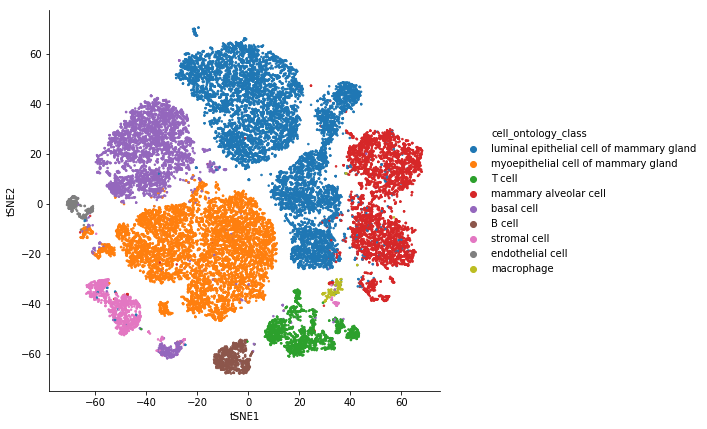

In [37]:
plot = mouse.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Mammary_Gland/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


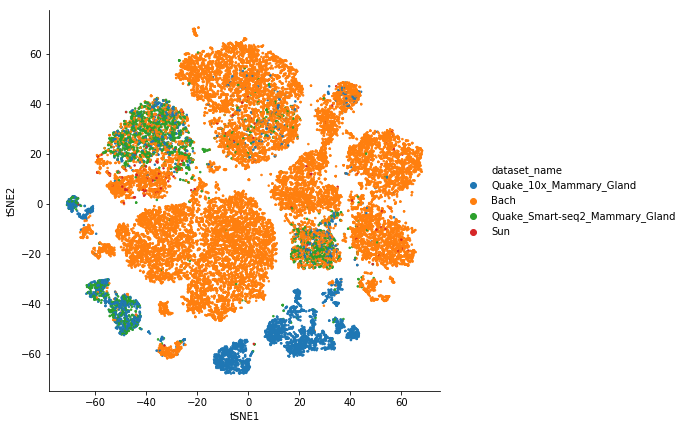

In [38]:
plot = mouse.visualize_latent("dataset_name")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Mammary_Gland/dataset_name.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


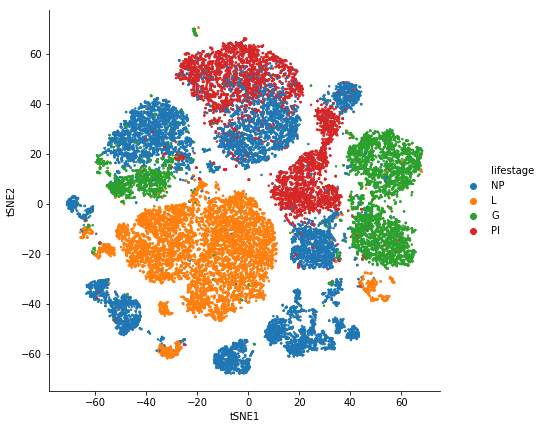

In [39]:
plot = mouse.visualize_latent("lifestage")

In [40]:
%%capture capio
mouse_models = [mouse_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    mouse_models.append(cb.directi.fit_DIRECTi(
        mouse, mouse.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/ALIGNED_Mus_musculus_Mammary_Gland/model_%d" % i
    ))
mouse_blast = cb.blast.BLAST(mouse_models, mouse, keep_exprs=True).build_empirical()
mouse_blast.save("ALIGNED_Mus_musculus_Mammary_Gland")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Mammary_Gland/model_1/checkpoint-165
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Mammary_Gland/model_2/checkpoint-110
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Mammary_Gland/model_3/checkpoint-138


In [41]:
with open("ALIGNED_Mus_musculus_Mammary_Gland/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("ALIGNED_Mus_musculus_Mammary_Gland/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [42]:
utils.self_projection(mouse_blast, "ALIGNED_Mus_musculus_Mammary_Gland")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/conda/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:316: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9950
Accuracy = 0.9918


---
# Human
### Nguyen_10x

,cell_ontology_class,cell_ontology_id,cell_type1,country,dataset_name,donor,lifestage,organ,organism,platform,region
Ind4_AAACATACGTACAC,basal cell,CL:0000646,Basal,caucasion,Nguyen_10x,Ind4,36-year,Mammary Gland,Homo sapiens,10x,epithelial cells
Ind4_AAACATTGCCTCCA,basal cell,CL:0000646,Basal,caucasion,Nguyen_10x,Ind4,36-year,Mammary Gland,Homo sapiens,10x,epithelial cells
Ind4_AAACATTGTGAAGA,luminal epithelial cell of mammary gland,CL:0002326,Luminal_1_1,caucasion,Nguyen_10x,Ind4,36-year,Mammary Gland,Homo sapiens,10x,epithelial cells
Ind4_AAACCGTGCCTTAT,basal cell,CL:0000646,Basal,caucasion,Nguyen_10x,Ind4,36-year,Mammary Gland,Homo sapiens,10x,epithelial cells
Ind4_AAACCGTGCTACTT,luminal epithelial cell of mammary gland,CL:0002326,Luminal_1_2,caucasion,Nguyen_10x,Ind4,36-year,Mammary Gland,Homo sapiens,10x,epithelial cells


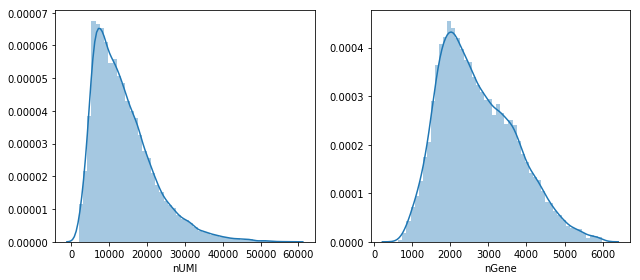

In [43]:
nguyen_10x = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Nguyen_10x/data.h5")
utils.peek(nguyen_10x, "Nguyen_10x")
nguyen_10x = nguyen_10x.normalize()
nguyen_10x.obs.head()

In [44]:
opt_model_kwargs = dict(batch_effect="donor")
nguyen_10x_model = cb.directi.fit_DIRECTi(
    nguyen_10x, nguyen_10x.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Nguyen_10x/model_0"
)
nguyen_10x.latent = nguyen_10x_model.inference(nguyen_10x)

[DIRECTi epoch 0] train=2.706, val=1.469, time elapsed=3.1s Regular save...
[DIRECTi epoch 1] train=1.411, val=1.363, time elapsed=2.5s
[DIRECTi epoch 2] train=1.320, val=1.337, time elapsed=2.6s
[DIRECTi epoch 3] train=1.289, val=1.314, time elapsed=2.6s
[DIRECTi epoch 4] train=1.259, val=1.259, time elapsed=2.5s
[DIRECTi epoch 5] train=1.237, val=1.259, time elapsed=2.5s
[DIRECTi epoch 6] train=1.219, val=1.227, time elapsed=2.5s
[DIRECTi epoch 7] train=1.207, val=1.208, time elapsed=2.6s
[DIRECTi epoch 8] train=1.198, val=1.195, time elapsed=2.5s
[DIRECTi epoch 9] train=1.192, val=1.196, time elapsed=2.5s
[DIRECTi epoch 10] train=1.187, val=1.191, time elapsed=2.5s Regular save...
[DIRECTi epoch 11] train=1.181, val=1.177, time elapsed=2.5s
[DIRECTi epoch 12] train=1.174, val=1.172, time elapsed=2.5s
[DIRECTi epoch 13] train=1.170, val=1.167, time elapsed=2.5s
[DIRECTi epoch 14] train=1.167, val=1.164, time elapsed=2.6s
[DIRECTi epoch 15] train=1.165, val=1.165, time elapsed=2.6s
[D

[  Info   ] Computing tSNE...


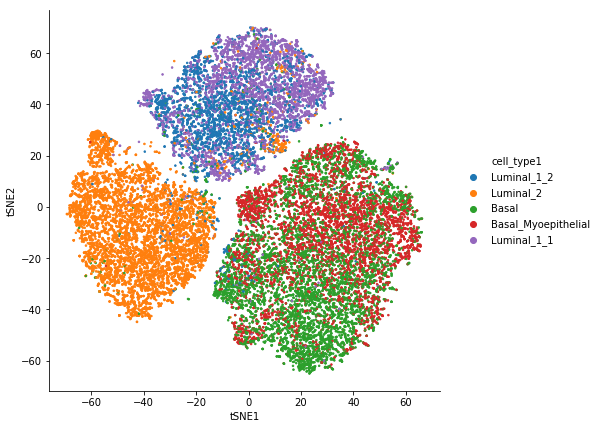

In [45]:
plot = nguyen_10x.visualize_latent("cell_type1")
plot.get_figure().savefig("Nguyen_10x/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


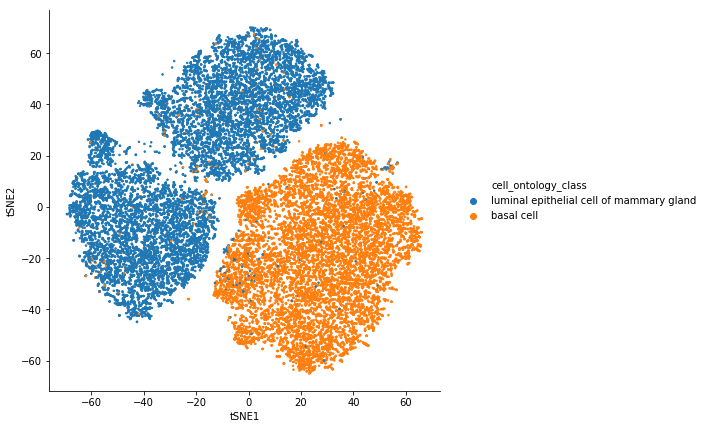

In [46]:
plot = nguyen_10x.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Nguyen_10x/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


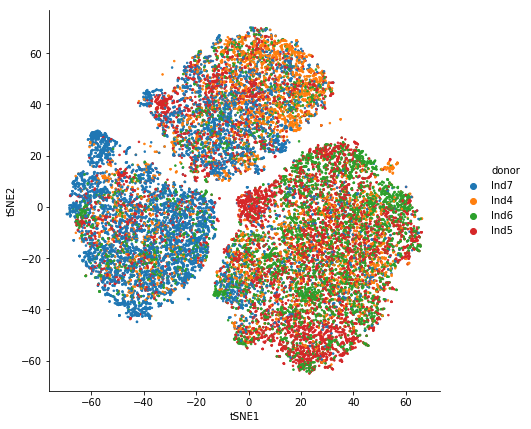

In [47]:
plot = nguyen_10x.visualize_latent("donor")
plot.get_figure().savefig("Nguyen_10x/donor.pdf", bbox_inches="tight")

In [48]:
%%capture capio
nguyen_10x_models = [nguyen_10x_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    nguyen_10x_models.append(cb.directi.fit_DIRECTi(
        nguyen_10x, nguyen_10x.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Nguyen_10x/model_%d" % i
    ))
nguyen_10x_blast = cb.blast.BLAST(nguyen_10x_models, nguyen_10x, 
                                               keep_exprs=True).build_empirical()
nguyen_10x_blast.save("Nguyen_10x")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Nguyen_10x/model_1/checkpoint-150
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Nguyen_10x/model_2/checkpoint-135
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Nguyen_10x/model_3/checkpoint-138


In [49]:
with open("Nguyen_10x/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Nguyen_10x/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [50]:
utils.self_projection(nguyen_10x_blast, "Nguyen_10x")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9971
Accuracy = 0.9869


## Human aligned

In [51]:
if not os.path.exists("ALIGNED_Homo_sapiens_Mammary_Gland"):
    os.makedirs("ALIGNED_Homo_sapiens_Mammary_Gland")
nguyen_c1 = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Nguyen_C1/data.h5").normalize()
nguyen_10x.obs["nguyen_10x_donor"] = nguyen_10x.obs["donor"]
human = cb.data.ExprDataSet.merge_datasets(dict(
    nguyen_10x=nguyen_10x,
    nguyen_c1=nguyen_c1
), merge_uns_slots=["seurat_genes"])

[  Info   ] Merging uns slots...
[  Info   ] Merging var data frame...
[  Info   ] Merging obs data frame...
[  Info   ] Merging expression matrix...


/home/caozj/Software/conda/envs/cb-gpu/lib/python3.6/site-packages/Cell_BLAST/data.py:579: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  merged_obs = pd.concat(merged_obs)


In [52]:
opt_model_kwargs = dict(
    batch_effect=["dataset_name", "nguyen_10x_donor"],
    rmbatch_module_kwargs=[dict(lambda_reg=0.02), dict(lambda_reg=0.005)],
    prob_module_kwargs=dict(lambda_reg=0.001)
)
human_model = cb.directi.fit_DIRECTi(
    human, human.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/ALIGNED_Homo_sapiens_Mammary_Gland/model_0"
)
human.latent = human_model.inference(human)

[DIRECTi epoch 0] train=2.038, val=1.051, time elapsed=4.0s Regular save...
[DIRECTi epoch 1] train=0.866, val=0.839, time elapsed=3.3s
[DIRECTi epoch 2] train=0.808, val=1.020, time elapsed=3.2s
[DIRECTi epoch 3] train=0.778, val=0.800, time elapsed=3.3s
[DIRECTi epoch 4] train=0.758, val=0.766, time elapsed=3.2s
[DIRECTi epoch 5] train=0.746, val=0.751, time elapsed=3.3s
[DIRECTi epoch 6] train=0.737, val=0.742, time elapsed=3.3s
[DIRECTi epoch 7] train=0.730, val=0.738, time elapsed=3.2s
[DIRECTi epoch 8] train=0.725, val=0.734, time elapsed=3.4s
[DIRECTi epoch 9] train=0.722, val=0.729, time elapsed=3.3s
[DIRECTi epoch 10] train=0.719, val=0.723, time elapsed=3.2s Regular save...
[DIRECTi epoch 11] train=0.716, val=0.725, time elapsed=3.2s
[DIRECTi epoch 12] train=0.714, val=0.722, time elapsed=3.3s
[DIRECTi epoch 13] train=0.712, val=0.721, time elapsed=3.3s
[DIRECTi epoch 14] train=0.711, val=0.718, time elapsed=3.3s
[DIRECTi epoch 15] train=0.710, val=0.716, time elapsed=3.3s
[D

[  Info   ] Computing tSNE...


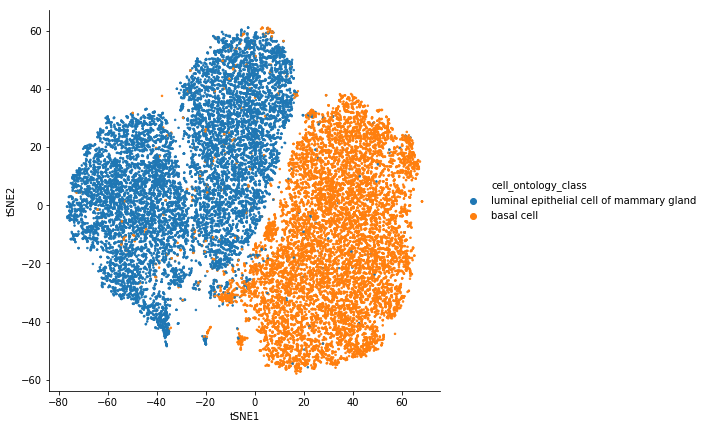

In [53]:
plot = human.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("ALIGNED_Homo_sapiens_Mammary_Gland/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


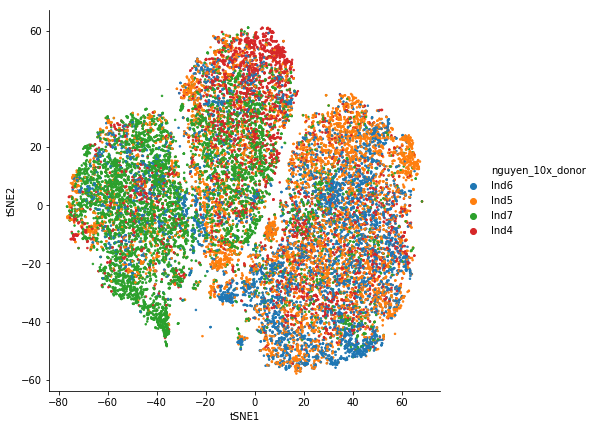

In [54]:
plot = human.visualize_latent("nguyen_10x_donor")
plot.get_figure().savefig("ALIGNED_Homo_sapiens_Mammary_Gland/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


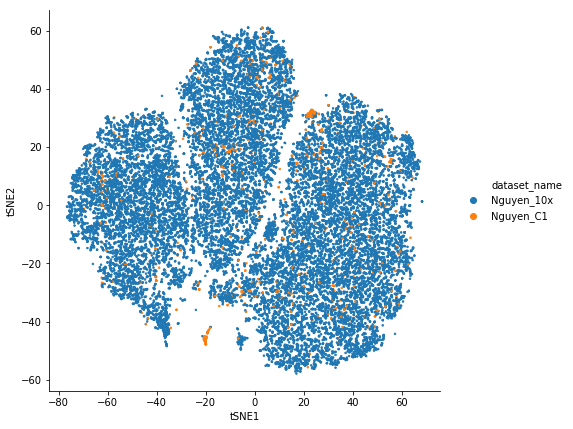

In [55]:
plot = human.visualize_latent("dataset_name")
plot.get_figure().savefig("ALIGNED_Homo_sapiens_Mammary_Gland/dataset_name.pdf", bbox_inches="tight")

In [56]:
%%capture capio
human_models = [human_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    human_models.append(cb.directi.fit_DIRECTi(
        human, human.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/ALIGNED_Homo_sapiens_Mammary_Gland/model_%d" % i
    ))

INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Homo_sapiens_Mammary_Gland/model_1/checkpoint-90
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Homo_sapiens_Mammary_Gland/model_2/checkpoint-50
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Homo_sapiens_Mammary_Gland/model_3/checkpoint-67


In [57]:
human_blast = cb.blast.BLAST(human_models, human, keep_exprs=True).build_empirical()
human_blast.save("ALIGNED_Homo_sapiens_Mammary_Gland")

[  Info   ] Projecting to latent space...
[  Info   ] Fitting nearest neighbor trees...
[  Info   ] Computing posterior distribution distances...


In [58]:
with open("ALIGNED_Homo_sapiens_Mammary_Gland/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("ALIGNED_Homo_sapiens_Mammary_Gland/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [59]:
utils.self_projection(human_blast, "ALIGNED_Homo_sapiens_Mammary_Gland")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/conda/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:316: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9899
Accuracy = 0.9862
